## KMeans Clustering Implementation

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Make Dataset
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [13]:
X

array([[-6.36189717,  2.62031308],
       [-5.88014003, -7.78846606],
       [-9.52895978,  2.32739742],
       ...,
       [-4.35514847,  1.32459555],
       [-5.13312772, -6.90496724],
       [-5.080161  , -0.57605717]], shape=(1000, 2))

In [14]:
y

array([2, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2,
       2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 1, 0, 0, 2,
       2, 2, 1, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2,
       0, 2, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2,
       0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1,
       2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       2, 0, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 0,
       1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 1,
       0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 0, 1, 1, 2, 2, 0, 2, 0, 0, 2, 2,

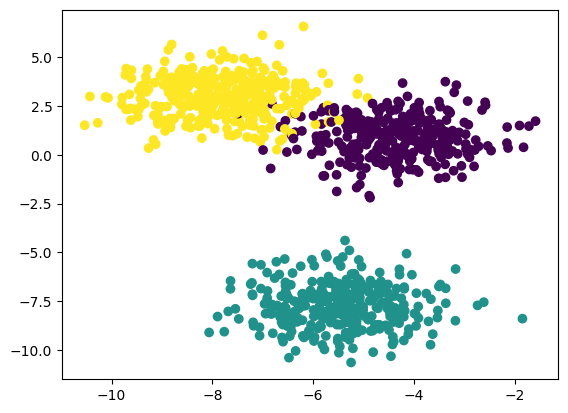

In [15]:
plt.scatter(X[:,0],X[:,1],c=y)

You can see that we have points in 3 groups and we are going to cluster them using KMeans clustering

In [16]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [17]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## KMeans Clustering

In [20]:
from sklearn.cluster import KMeans

### Elbow Method to select K Value

In [21]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)


In [22]:
wcss

[1340.0000000000005,
 640.1954320098106,
 229.32772942360225,
 182.67690115727117,
 134.26981245022142,
 102.10817282656318,
 86.4616202321057,
 78.83304810850058,
 69.12082553460914,
 68.1395337048038]

Text(0, 0.5, 'WCSS')

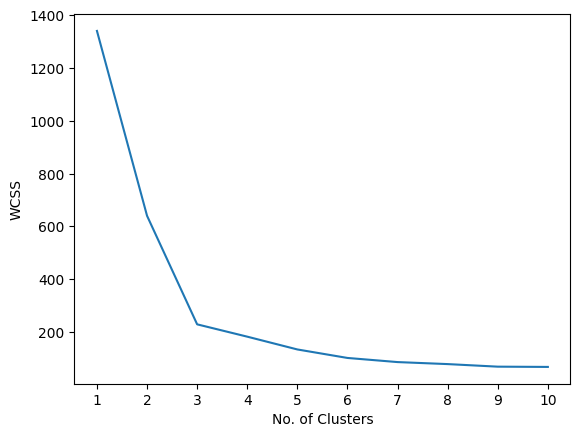

In [26]:
# Plot Elbow Curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")

See the Elbow seeing that K=3

In [27]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,init="k-means++")
kmeans.fit_predict(X_train_scaled)

array([1, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1,
       0, 1, 0, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 2, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0,
       1, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0,
       1, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0,
       1, 0, 0, 2, 1, 2, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 2,
       2, 2, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 1, 1, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0,
       0, 1, 2, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 1,
       2, 2, 1, 2, 2, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1,

In [28]:
Y_pred=kmeans.predict(X_test_scaled)

In [29]:
Y_pred

array([0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1,
       2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 2,
       1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1,
       0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0,
       0, 1, 0, 2, 2, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0,
       0, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 0, 2, 1, 0, 2, 2, 0, 1, 0,
       2, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 1,
       1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,

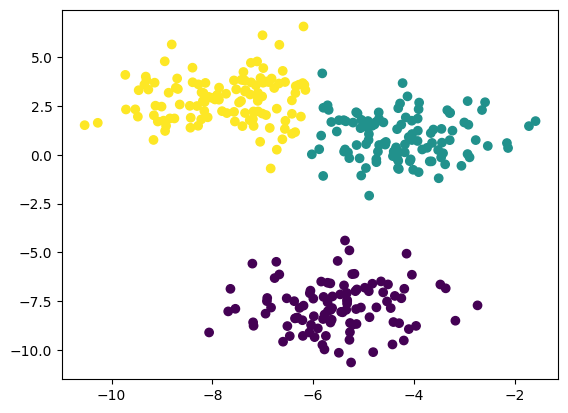

In [30]:
plt.scatter(X_test[:,0],X_test[:,1],c=Y_pred)

Sometime for selecting K the elbow method becomes difficult so To Validate K Values we use 2 other techniques
1. KneeLocator
2. Silhoutee Scoring

## Knee Locator

In [31]:
from kneed import KneeLocator

In [32]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [34]:
print(kl.elbow)

3


### silhouette Scoring

In [36]:
from sklearn.metrics import silhouette_score
silhouette_coefficient=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficient.append(score)

In [37]:
silhouette_coefficient

[np.float64(0.5020050615126589),
 np.float64(0.6322096948899596),
 np.float64(0.5646379749287088),
 np.float64(0.4868120621150821),
 np.float64(0.44287492312294313),
 np.float64(0.42840890320287667),
 np.float64(0.4145447470024388),
 np.float64(0.38664583600736896),
 np.float64(0.37775077179787464)]

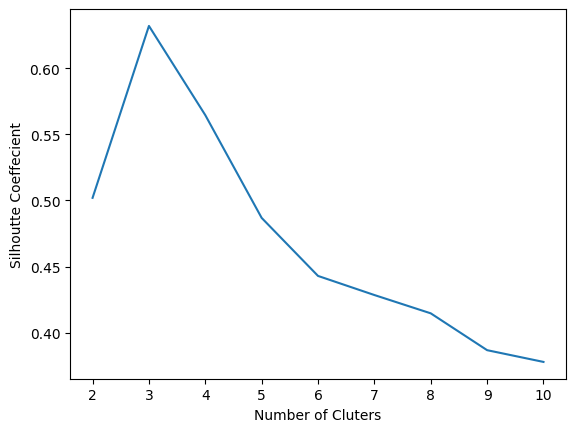

In [38]:
plt.plot(range(2,11),silhouette_coefficient)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()